*Luka Alhonen*

# Exercise 6

## 1. Compulsory tasks

### 1.1 Learning diary

**Deep Learning in DS4IoT**

Deep learning is a very powerful tool and can be very useful in data science for IoT, however because of the complexity of deep learning models, they face a number of issues in this field. Training a deep learning model requires a lot of processing power and is therefore not feasible on most devices, however running a trained model is less resource consuming and can be achieved on many devices. 

Often, due to the large amount of parameters, deep learning models have to either be offloaded or compressed in order for them to run in a pervasive computing scenario. This can, for example,  be achieved with pruning; removing redundancy, compression; replacing filters with more compact ones or layer separation; replacing 2D filters with 1D filters.

<br>

**TensorFlow in DS4IoT**

In order to make development and deployment of deep learning models more efficient and intuitive, deep learning frameworks are often used. There exists a multitude of DL frameworks to chose from but when building a deep learning model for DS4IoT one has to consider the nature of this environment. The framework has to support a multitude of different devices, data, computation schemes and have good performance. 

TensorFlow is one such framework and is often used in pervasive computing as it allows for running computationally intensive tasks in environments with more resources and the deployment of deep learning models on many different devices. TensorFlow supports deployment on a number of different platforms such as mobile, browser and IoT and is designed to have high performance, making it a very good choice for DS4IoT.

## 4. Programming Tasks

### 4.1 Deep Learning CNN Programming

In [1]:
import tensorflow as tf

from tensorflow.keras import layers, Sequential
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#### a)

In [2]:
batch_sz = 32
img_h = 256
img_w = 256

In [3]:
training_ds = tf.keras.utils.image_dataset_from_directory(
    'solar_flares',
    validation_split=0.2,
    subset='training',
    seed=123,
    labels='inferred',
    image_size=(img_h,img_w),
    batch_size=batch_sz
    )

Found 1074 files belonging to 2 classes.
Using 860 files for training.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    'solar_flares',
    validation_split=0.2,
    subset='validation',
    seed=123,
    labels='inferred',
    image_size=(img_h,img_w),
    batch_size=batch_sz
    )

Found 1074 files belonging to 2 classes.
Using 214 files for validation.


Implementation of DL model

![Alt text](DL_model_architecture.png)

In [5]:
class_names = training_ds.class_names
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_h, img_w, 3)),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes)
])

/Users/luka/Developer/DS_IoT/.venv/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Compile model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,149,810 (4.39 MB)

 Trainable params: 1,149,810 (4.39 MB)

 Non-trainable params: 0 (0.00 B)

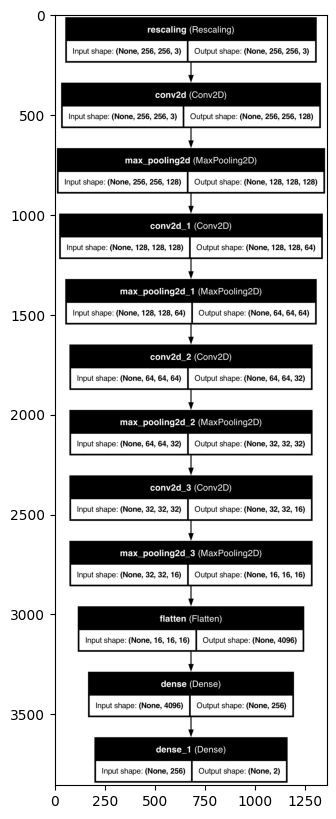

In [8]:
# Plot model architecture
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

img = mpimg.imread('model_plot.png')
plt.figure(figsize=(10,10))
imgplot = plt.imshow(img)
plt.show()

#### b) 

As one can see from the output below and plot 1.1, the model reaches accuracy and validation accuracy > 90% at epoch 7.

In [9]:
epochs = 20
history = model.fit(
    training_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5279 - loss: 0.7828 - val_accuracy: 0.4486 - val_loss: 0.6915
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5370 - loss: 0.6818 - val_accuracy: 0.7103 - val_loss: 0.6410
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.6654 - loss: 0.6086 - val_accuracy: 0.6402 - val_loss: 0.5888
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.7413 - loss: 0.5528 - val_accuracy: 0.7804 - val_loss: 0.4354
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.8387 - loss: 0.3988 - val_accuracy: 0.8738 - val_loss: 0.2791
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.8979 - loss: 0.2227 - val_accuracy: 0.8972 - val_loss: 0.2399
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.9279 - loss: 0.1971 - val_accuracy: 0.9112 - val_loss: 0.2150
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.9470 - loss: 0.1444 - val_accuracy: 0.9065 - val_loss:

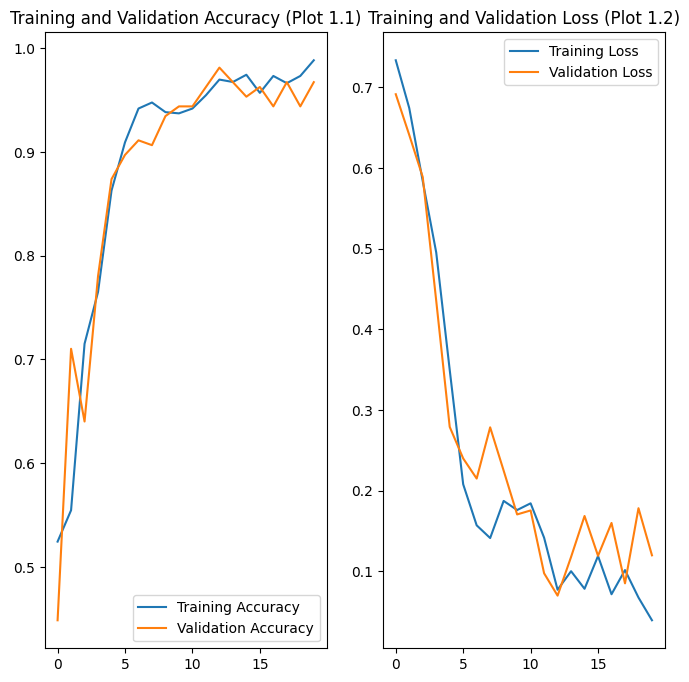

In [13]:
# Plot training results of original model
og_acc = history.history['accuracy']
og_val_acc = history.history['val_accuracy']

og_loss = history.history['loss']
og_val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, og_acc, label='Training Accuracy')
plt.plot(epochs_range, og_val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (Plot 1.1)')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, og_loss, label='Training Loss')
plt.plot(epochs_range, og_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (Plot 1.2)')
plt.show()

#### c)

Interestingly, the performance of the model seems to degrade when trained with an augmentation layer (accuracy: 0.9646 - loss: 0.1002 - val_accuracy: 0.9346 - val_loss: 0.1806)

and even more for the model with a dropout layer (accuracy: 0.9557 - loss: 0.1216 - val_accuracy: 0.9907 - val_loss: 0.0692)

compared to the original model (accuracy: 0.9816 - loss: 0.0601 - val_accuracy: 0.9673 - val_loss: 0.1198)

**Model with data augmentation layer**

In [14]:
# Data augmentation layer
data_augmentation = Sequential([
    layers.RandomFlip('vertical', input_shape=(img_h, img_w, 3))
])

/Users/luka/Developer/DS_IoT/.venv/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
# Model with vertical flip augmentation layer
model2 = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_h, img_w, 3)),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes)
])

In [16]:
# Compile model
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

In [18]:
history2 = model2.fit(
    training_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.4891 - loss: 0.6985 - val_accuracy: 0.5888 - val_loss: 0.6865
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5322 - loss: 0.6956 - val_accuracy: 0.4486 - val_loss: 0.6999
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.5480 - loss: 0.6893 - val_accuracy: 0.4486 - val_loss: 0.7009
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5251 - loss: 0.6917 - val_accuracy: 0.4486 - val_loss: 0.7122
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5304 - loss: 0.6876 - val_accuracy: 0.4486 - val_loss: 0.6994
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5597 - loss: 0.6640 - val_accuracy: 0.6542 - val_loss: 0.6384
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.6865 - loss: 0.6544 - val_accuracy: 0.7103 - val_loss: 0.6033
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.6310 - loss: 0.6179 - val_accuracy: 0.6822 - val_loss:

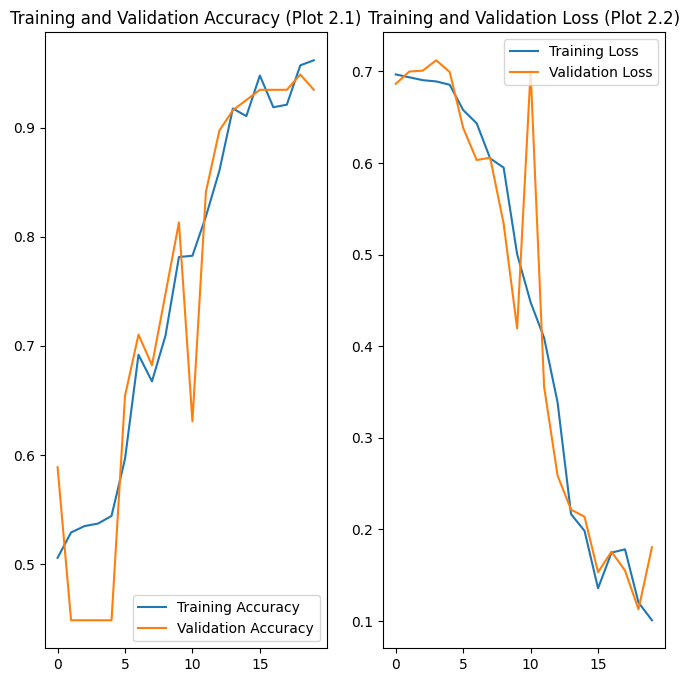

In [21]:
# Plot training results of model with augmentation layer
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc2, label='Training Accuracy')
plt.plot(epochs_range, val_acc2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (Plot 2.1)')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss2, label='Training Loss')
plt.plot(epochs_range, val_loss2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (Plot 2.2)')
plt.show()

**Model with droput layer**

In [23]:
model3 = Sequential([
    layers.Rescaling(1./255, input_shape=(img_h, img_w, 3)),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes)
])

/Users/luka/Developer/DS_IoT/.venv/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

In [25]:
history3 = model3.fit(
    training_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.4804 - loss: 0.7219 - val_accuracy: 0.4486 - val_loss: 0.6936
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.5461 - loss: 0.6876 - val_accuracy: 0.6916 - val_loss: 0.6536
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.5443 - loss: 0.6993 - val_accuracy: 0.4766 - val_loss: 0.6876
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.6186 - loss: 0.6464 - val_accuracy: 0.4813 - val_loss: 0.6900
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.6759 - loss: 0.6224 - val_accuracy: 0.4907 - val_loss: 0.6957
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.6935 - loss: 0.5646 - val_accuracy: 0.8645 - val_loss: 0.4027
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.7849 - loss: 0.4633 - val_accuracy: 0.9065 - val_loss: 0.3348
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.8268 - loss: 0.4481 - val_accuracy: 0.8458 - val_loss:

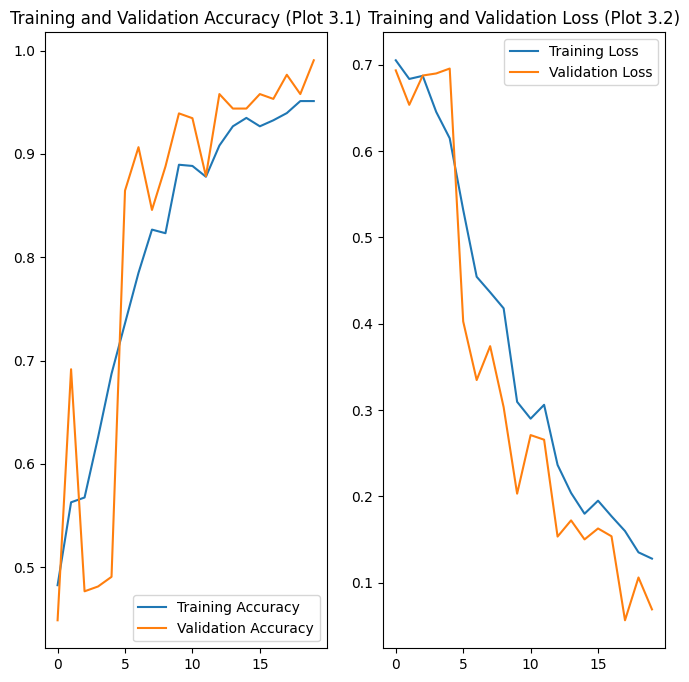

In [27]:
# Plot training results of model with augmentation layer
acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']

loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc3, label='Training Accuracy')
plt.plot(epochs_range, val_acc3, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (Plot 3.1)')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss3, label='Training Loss')
plt.plot(epochs_range, val_loss3, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (Plot 3.2)')
plt.show()

#### d)

When replacing relu with sigmoid, the performance of the model suffers significantly. The accuracy starts off at around 50% but instead of improving jus stays around the same.

In [28]:
model4 = Sequential([
    layers.Rescaling(1./255, input_shape=(img_h, img_w, 3)),
    layers.Conv2D(128, 3, padding='same', activation='sigmoid'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='sigmoid'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='sigmoid'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='sigmoid'),
    layers.Dense(num_classes)
])

/Users/luka/Developer/DS_IoT/.venv/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

In [31]:
history4 = model4.fit(
    training_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.5112 - loss: 1.6687 - val_accuracy: 0.5514 - val_loss: 0.6898
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.5097 - loss: 0.7017 - val_accuracy: 0.4486 - val_loss: 0.7041
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.4982 - loss: 0.6934 - val_accuracy: 0.4486 - val_loss: 0.7127
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.5157 - loss: 0.6935 - val_accuracy: 0.4486 - val_loss: 0.7095
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.5027 - loss: 0.6982 - val_accuracy: 0.4486 - val_loss: 0.7439
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.5113 - loss: 0.7081 - val_accuracy: 0.5514 - val_loss: 0.6914
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.5022 - loss: 0.7082 - val_accuracy: 0.5514 - val_loss: 0.6879
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.5010 - loss: 0.6957 - val_accuracy: 0.4486 - val_loss:

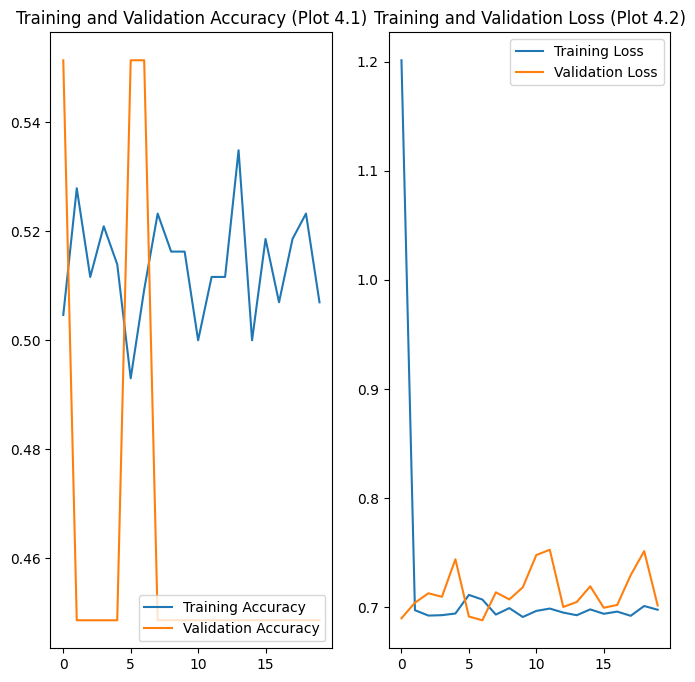

In [32]:
acc4 = history4.history['accuracy']
val_acc4 = history4.history['val_accuracy']

loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc4, label='Training Accuracy')
plt.plot(epochs_range, val_acc4, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (Plot 4.1)')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss4, label='Training Loss')
plt.plot(epochs_range, val_loss4, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (Plot 4.2)')
plt.show()